# Medical Cost Prediction🏥

Our primary goal is to build a model to accurately predict insurance costs.

Link to the dataset I used -> "https://www.kaggle.com/datasets/mirichoi0218/insurance"

#### Info about the dataset variables ->

*`age`: age of primary beneficiary

*`sex`: insurance contractor gender, female, male

*`bmi`: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

*`children`: Number of children covered by health insurance / Number of dependents

*`smoker`: Smoking

*`region`: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

*`charges`: Individual medical costs billed by health insurance

##### IMPORTING THE LIBRARIES

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [23]:
# Importing the data 
data = pd.read_csv("insurance.csv")

In [24]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


WOAH! OVER 1300 ENTRIES

In [26]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [27]:
data["sex"].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [28]:
data.region.value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [29]:
data.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

WE CAN SEE THERE IS A GOOD CLASS IMBALANCE IN SMOKER VALUES

In [30]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

AS WE CAN SEE, WE DONT HAVE ANY NULL VALUES. WHICH IS A GOOD THING

In [31]:
print(data.duplicated().sum())

1


In [32]:
data["smoker"] = data["smoker"].map({'yes':1,'no':0})

In [33]:
data["smoker"].value_counts()

smoker
0    1064
1     274
Name: count, dtype: int64

### Let's visualise our data

In [34]:
data[:2]

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,1,southwest,16884.9240
1,18,male,33.77,1,0,southeast,1725.5523


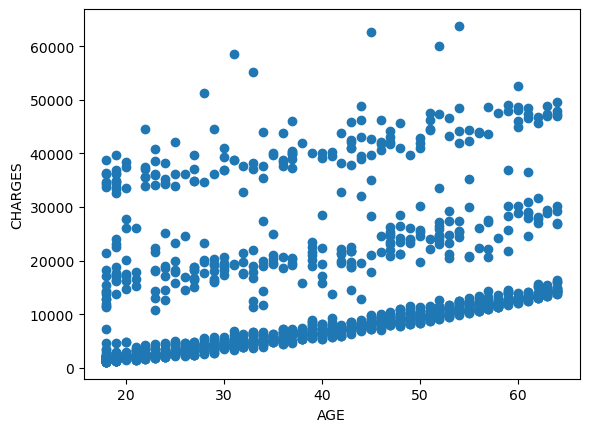

In [37]:
fig, ax = plt.subplots();
ax.scatter(x=data["age"],
           y = data["charges"]);
ax.set_xlabel("AGE");
ax.set_ylabel("CHARGES");

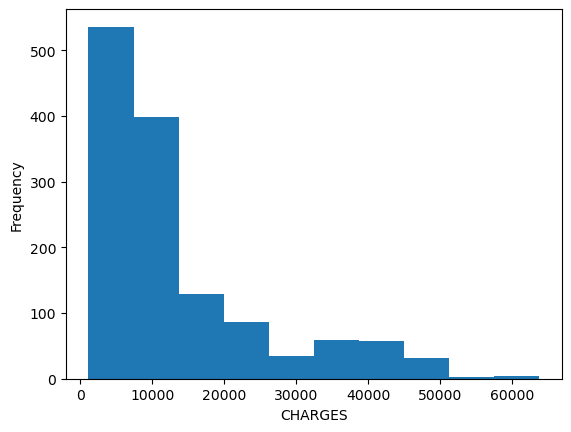

In [39]:
data.charges.plot.hist(xlabel="CHARGES");

In [43]:
data["sex"] = data["sex"].map({'male':1, 'female': 0})

In [44]:
data["sex"].head()

0    0
1    1
2    1
3    1
4    1
Name: sex, dtype: int64

In [45]:
col = ["region"]
data =  pd.get_dummies(data,columns=col, drop_first = True, dtype = int)

In [46]:
data.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


In [47]:
x = data.drop("charges",axis=1)
y = data["charges"]

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.2, random_state = 42, stratify = data["smoker"])

In [50]:
from sklearn.preprocessing import StandardScaler
columns_to_scale = ['age', 'bmi', 'children']
scaler = StandardScaler()
x_train[columns_to_scale] = scaler.fit_transform(x_train[columns_to_scale])
x_test[columns_to_scale] = scaler.transform(x_test[columns_to_scale])

### LET'S TRAIN SOME BASE MODELS-->

LET'S TRAIN LINER REGRESSION FIRST .... FOR STARTERS 

In [54]:
from sklearn.linear_model import LinearRegression
lr_base_model = LinearRegression(fit_intercept=True)
lr_base_model.fit(x_train,y_train)

LinearRegression()

In [55]:
lr_base_model.score(x_test,y_test)

0.7888523049204454

LET'S TRAIN A RANDOM FOREST REGRRESION

In [56]:
from sklearn.ensemble import RandomForestRegressor
rf_base_model = RandomForestRegressor()
rf_base_model.fit(x_train,y_train)
rf_base_model.score(x_test,y_test)

0.8453937725463635

In [57]:
from xgboost import XGBRegressor
xgb_base_model = XGBRegressor()
xgb_base_model.fit(x_train,y_train)
xgb_base_model.score(x_test,y_test)

0.8273143041698429

Since we have our base models here.

LET'S HYPERTUNE THEM USING RANDOMIZED SEARCH CV

RANDOM FOREST REGRESSOR 

In [62]:
from sklearn.model_selection import RandomizedSearchCV
rf_param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 1.0]
}
rf_randsearch_model = RandomizedSearchCV(RandomForestRegressor(),
                                         param_distributions= rf_param_grid,
                                         n_jobs = -1,
                                         verbose = True,
                                         n_iter = 10,
                                         cv = 5,
                                         random_state=42)
rf_randsearch_model.fit(x_train,y_train)
rf_randsearch_model.score(x_test,y_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


0.859966816806632

XGBOOST REGRESSOR 

In [64]:
xgb_param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]
}

xgb_randsearch_model = RandomizedSearchCV(XGBRegressor(),
                                          param_distributions=xgb_param_grid,
                                          n_iter=10,
                                          n_jobs=-1,
                                          cv = 5,
                                          random_state=42,
                                          verbose=True)
xgb_randsearch_model.fit(x_train,y_train)
xgb_randsearch_model.score(x_test,y_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


0.8778172105925146

LET'S EVALUATE OUR MODELS 

LET'S CREATE A FUNCTION TO EVALUATE THE MODELS

In [65]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def show_scores(model, X_train, y_train, X_test, y_test):
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    scores = {
        "Training MAE": mean_absolute_error(y_train, train_preds),
        "Test MAE": mean_absolute_error(y_test, test_preds),
        "Training RMSE": np.sqrt(mean_squared_error(y_train, train_preds)),
        "Test RMSE": np.sqrt(mean_squared_error(y_test, test_preds)),
        "Training R^2": r2_score(y_train, train_preds),
        "Test R^2": r2_score(y_test, test_preds)
    }
    return scores

EVALUATING RANDOM FOREST MODEL 

In [66]:
show_scores(rf_randsearch_model,x_train,y_train, x_test, y_test)

{'Training MAE': 1785.4534532398754,
 'Test MAE': 2747.745996212899,
 'Training RMSE': 3240.232480130103,
 'Test RMSE': 4545.274799723421,
 'Training R^2': 0.9282326596069299,
 'Test R^2': 0.859966816806632}

EVALUATING XGBOOST REGRESSION

In [67]:
show_scores(xgb_randsearch_model,x_train,y_train, x_test, y_test)

{'Training MAE': 2358.9737692198596,
 'Test MAE': 2491.6499818723764,
 'Training RMSE': 4192.38140460094,
 'Test RMSE': 4245.703701001942,
 'Training R^2': 0.8798576612285541,
 'Test R^2': 0.8778172105925146}

In [74]:
import seaborn as sns
# --- Helper function to format plots ---
def setup_plot(title, xlabel, ylabel):
    """Sets up titles and labels for a plot."""
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()

# --- Chart 1: Feature Importance Plot ---
def plot_feature_importance(model, feature_names, model_name):
    """
    Creates and saves a horizontal bar chart of feature importances.
    """
    importances = model.best_estimator_.feature_importances_
    indices = np.argsort(importances)
    
    plt.figure(figsize=(12, 8))
    plt.barh(range(len(indices)), importances[indices], color='skyblue', align='center')
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    setup_plot(f'Feature Importance - {model_name}', 'Relative Importance', 'Features')
    plt.savefig(f'{model_name}_feature_importance.png')
    plt.show()

--- Generating plots for the champion XGBoost model ---


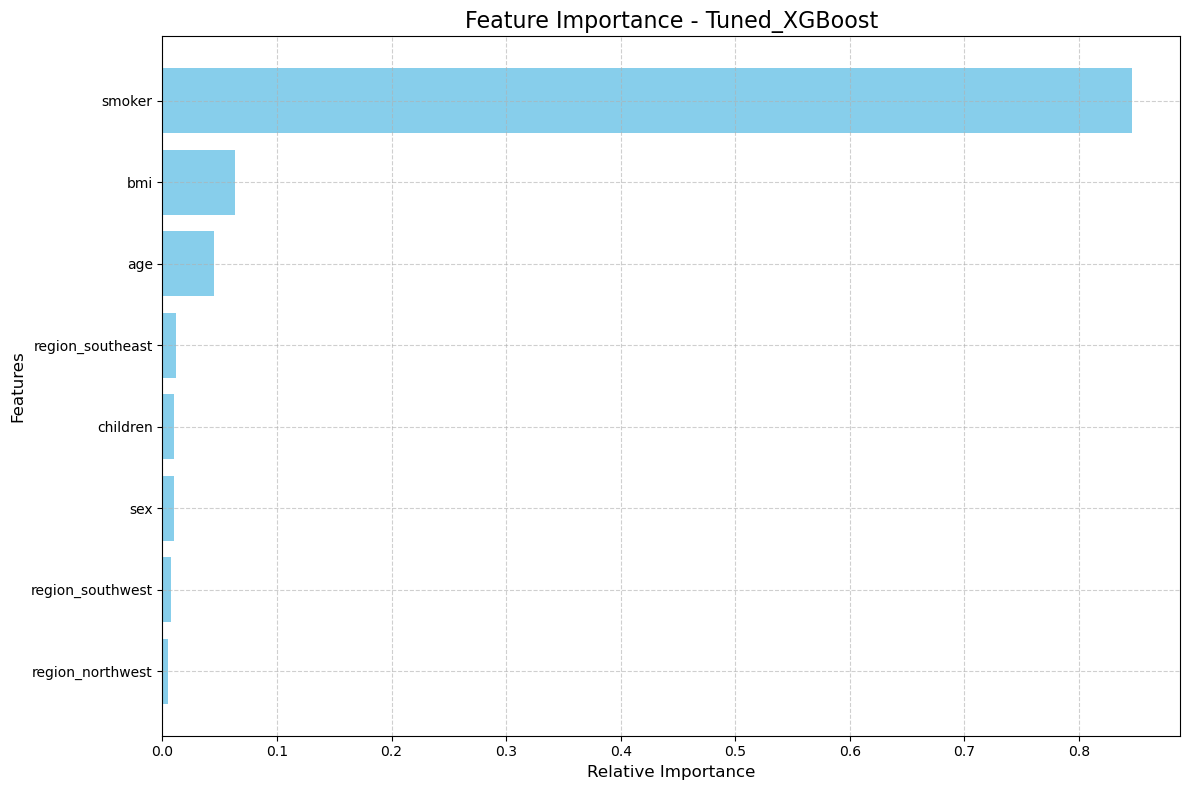

In [75]:
# 1. Get predictions from your best model (XGBoost)
xgb_predictions = xgb_randsearch_model.predict(x_test)

# 2. Generate the individual plots for the best model
print("--- Generating plots for the champion XGBoost model ---")
plot_feature_importance(xgb_randsearch_model, x_train.columns, 'Tuned_XGBoost')


In [76]:
def plot_predicted_vs_actual(y_test, predictions, model_name):
    """
    Creates and saves a scatter plot of predicted vs. actual values.
    """
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=y_test, y=predictions, alpha=0.6)
    # Add the ideal 45-degree line
    max_val = max(y_test.max(), predictions.max())
    plt.plot([0, max_val], [0, max_val], 'r--', lw=2, label='Ideal Fit')
    setup_plot(f'Predicted vs. Actual Charges - {model_name}', 'Actual Charges ($)', 'Predicted Charges ($)')
    plt.legend()
    plt.savefig(f'{model_name}_predicted_vs_actual.png')
    plt.show()


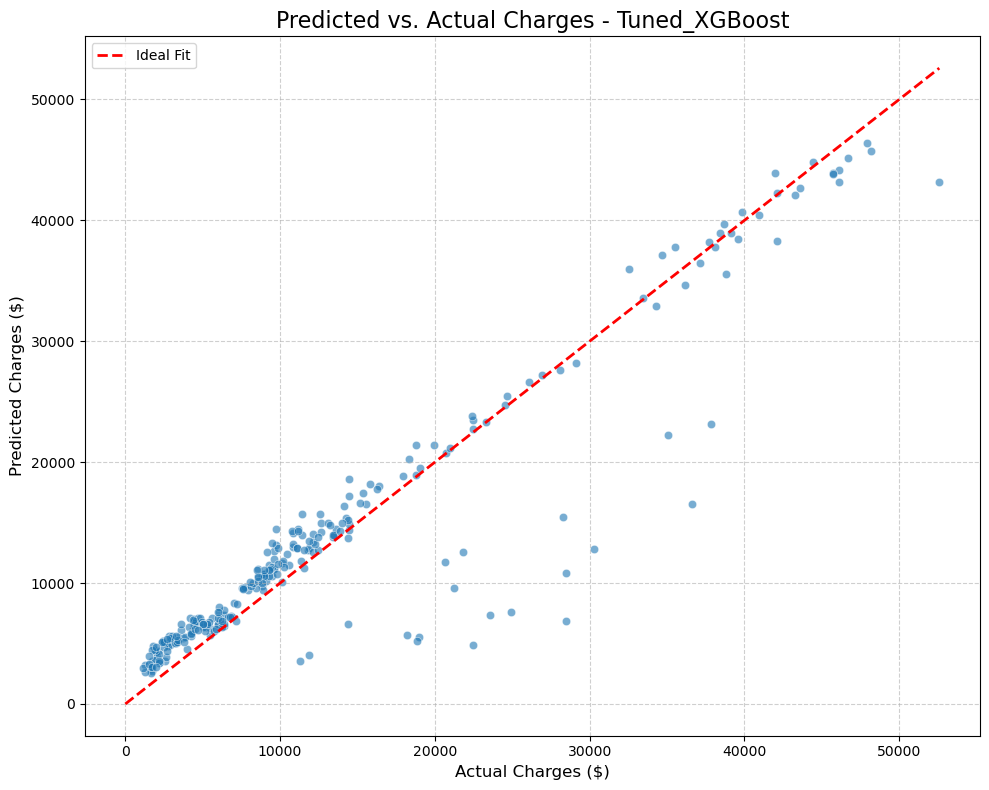

In [77]:
plot_predicted_vs_actual(y_test, xgb_predictions, 'Tuned_XGBoost')

In [78]:
def plot_residuals(y_test, predictions, model_name):
    """
    Creates and saves a scatter plot of the model's residuals.
    """
    residuals = y_test - predictions
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=predictions, y=residuals, alpha=0.6)
    # Add a horizontal line at y=0
    plt.axhline(y=0, color='r', linestyle='--', lw=2)
    setup_plot(f'Residuals Plot - {model_name}', 'Predicted Charges ($)', 'Residual (Actual - Predicted)')
    plt.savefig(f'{model_name}_residuals.png')
    plt.show()


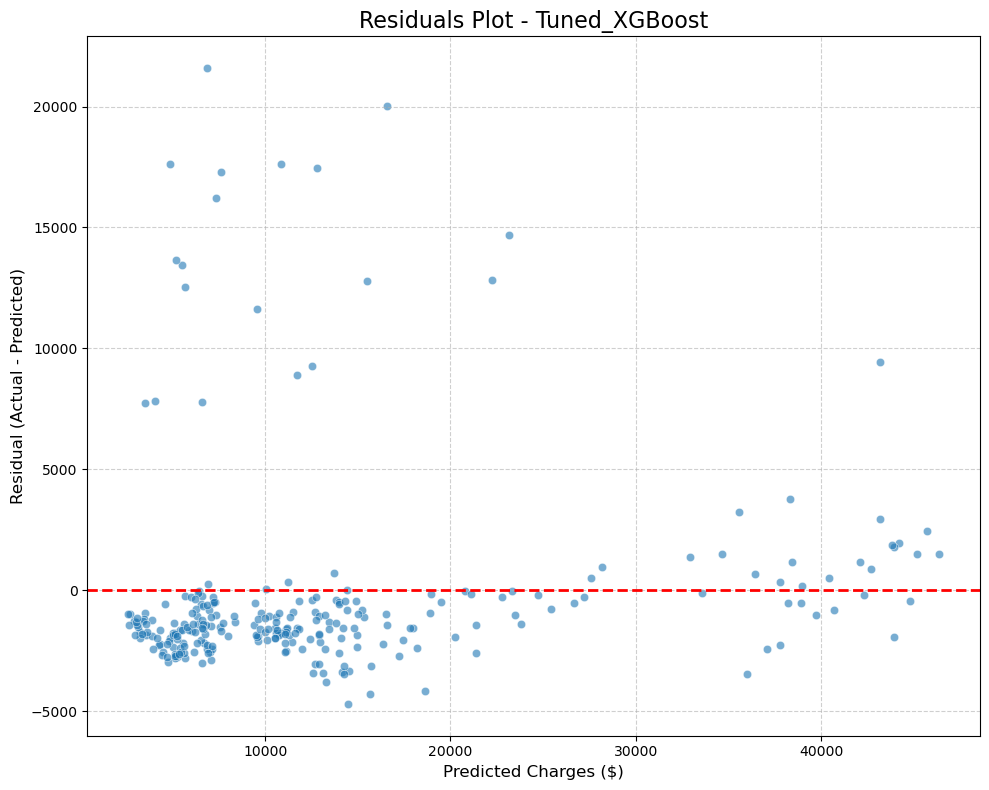

In [79]:
plot_residuals(y_test, xgb_predictions, 'Tuned_XGBoost')

--- Generating plots for the champion random forest regressor model ---


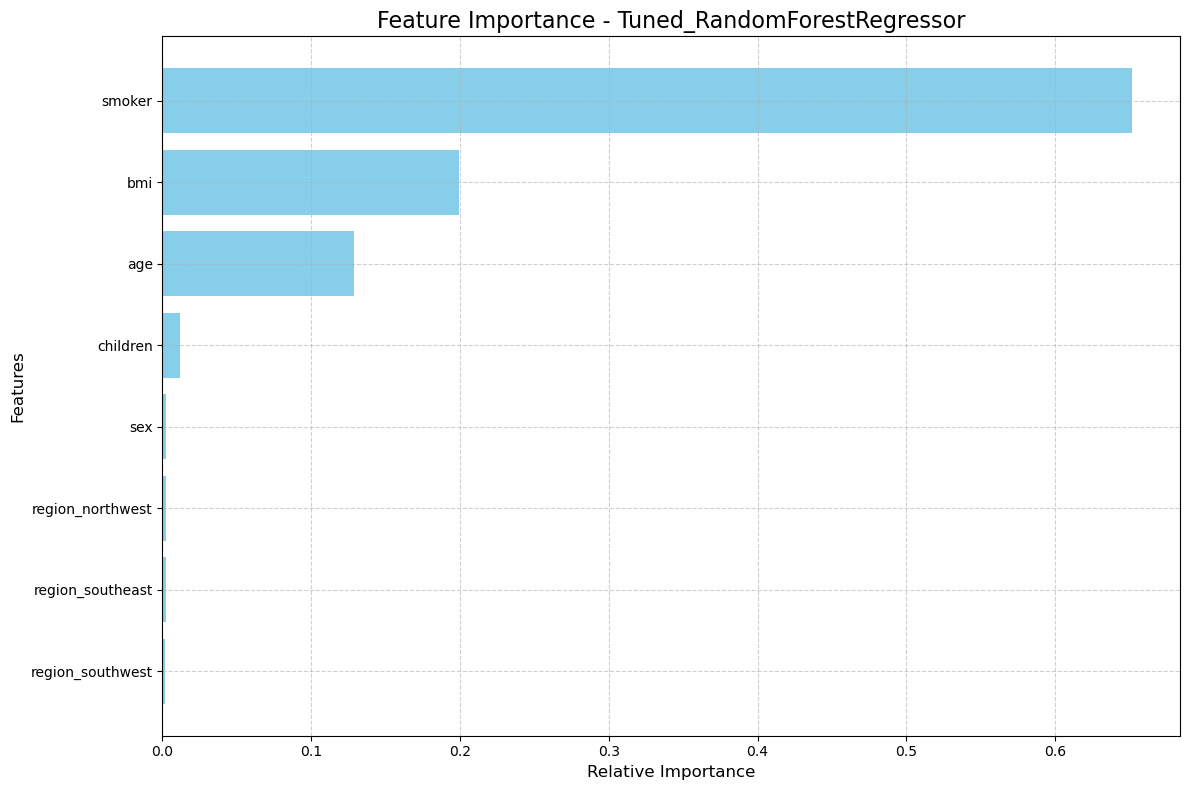

In [86]:
rf_predictions = rf_randsearch_model.predict(x_test)
print("--- Generating plots for the champion random forest regressor model ---")
plot_feature_importance(rf_randsearch_model, x_train.columns, 'Tuned_RandomForestRegressor')


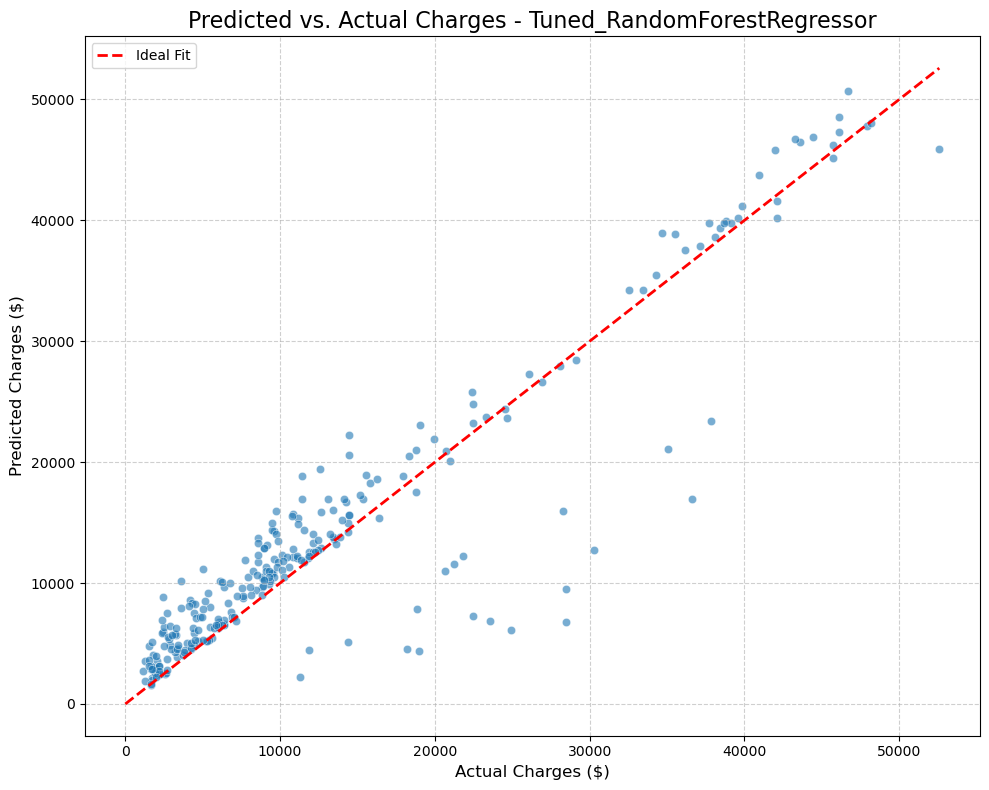

In [87]:
plot_predicted_vs_actual(y_test, rf_predictions, 'Tuned_RandomForestRegressor')

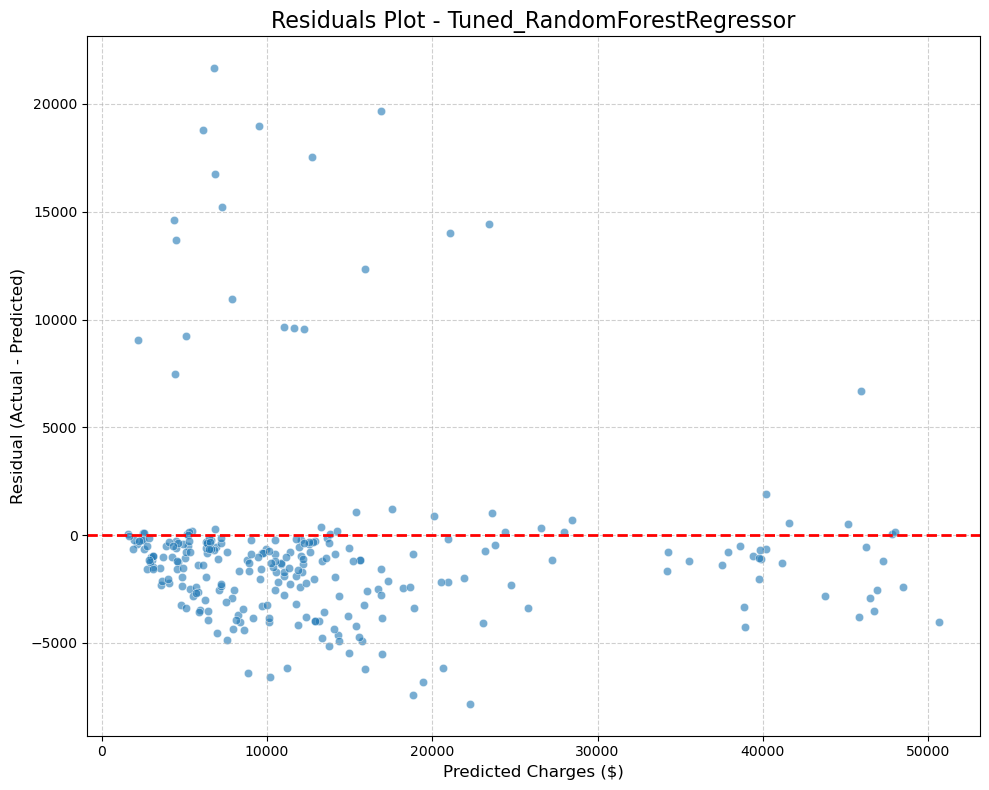

In [88]:
plot_residuals(y_test, rf_predictions, 'Tuned_RandomForestRegressor')


# --- FINAL PROJECT SUMMARY ---

This project successfully navigated the full machine learning workflow, from data cleaning
and feature engineering to model training, advanced hyperparameter tuning, and evaluation.
The final tuned XGBoost model achieved an R-squared score of approximately 0.88, a top-tier
result for this particular dataset. This indicates the model can explain 88% of the
variance in medical costs based on the available features.
Despite this high level of performance, the ambitious goal of breaking the 90% accuracy
barrier was not met. This outcome is not a reflection of the model's quality but rather
highlights the inherent limitations of the dataset itself. The remaining 12% of variance
is likely due to "irreducible error"—factors not captured in the data, such as specific
medical conditions, lifestyle habits beyond smoking, or genetic predispositions.
Ultimately, while the desire for a higher score is understandable, the project demonstrates
that the models have extracted the maximum possible insight from the provided information.